In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255  # Flatten images and normalize
x_test = x_test.astype('float32') / 255
x_train.shape

(60000, 28, 28)

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

In [6]:
model = tf.keras.models.Sequential([
    layers.Input(shape=(28 * 28,)),           # Input layer with 28*28=784 features
    layers.Dense(128, activation='relu'),     # First hidden layer with ReLU activation
    layers.Dense(64, activation='relu'),      # Second hidden layer with ReLU activation
    layers.Dense(10, activation='softmax')    # Output layer with softmax for 10 classes
])

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)

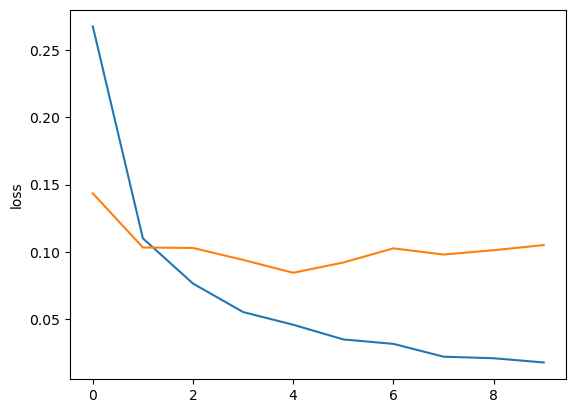

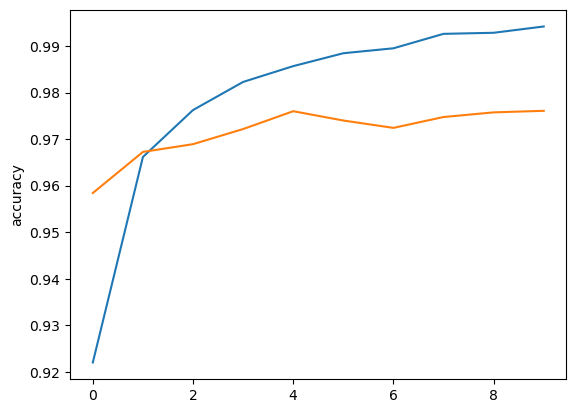

In [8]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'train')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'train')
plt.ylabel('accuracy')
plt.show()

In [9]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9722 - loss: 0.1152


[0.09971284121274948, 0.9760000109672546]

In [25]:
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


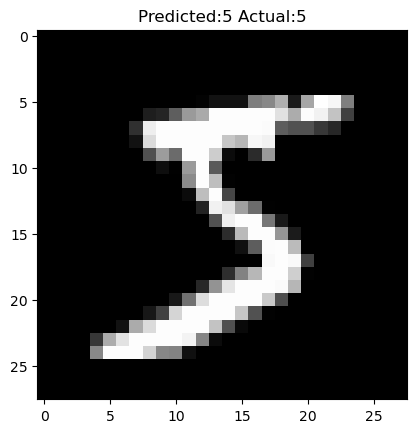

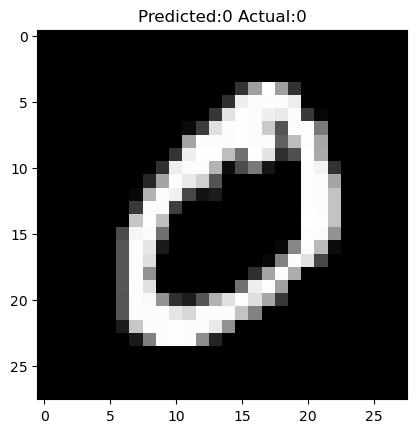

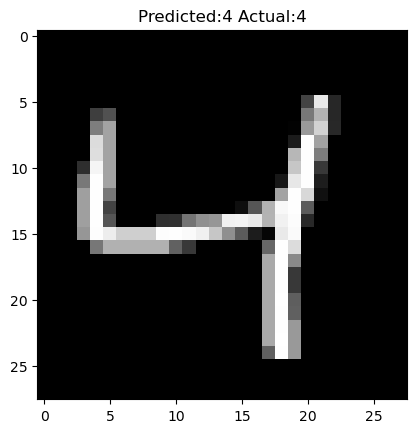

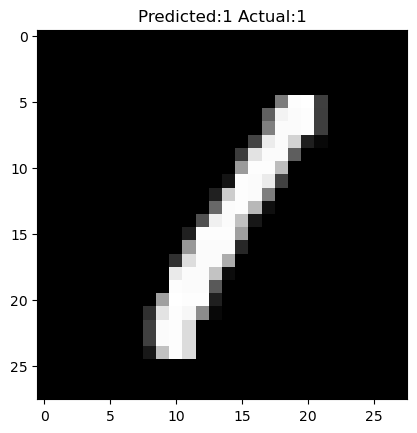

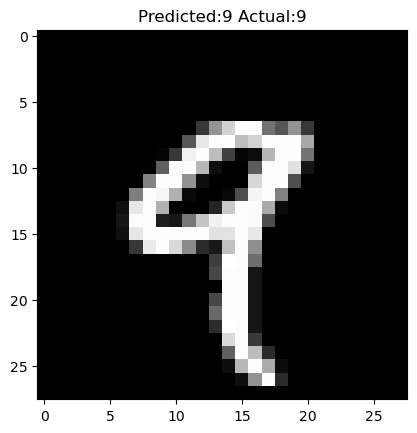

In [49]:
prob = model.predict(x_train[:5])
pred = np.argmax(prob, axis=1)

for i in range(5):
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title("Predicted:{} Actual:{}".format(pred[i], np.argmax(y_train[i])))
    plt.show()